<a href="https://colab.research.google.com/github/viniciusBalbi/-DataScience_challenge_Alura/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd

# URLs dos arquivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
url5 = "https://github.com/JeffSoledade/DataScience_challenge1/raw/main/base-de-dados-challenge-1/relatorio.csv"

# Leitura dos dados
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)
relatorio = pd.read_csv(url5)

In [79]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#**1. Análise do faturamento**


In [80]:
# Solução 1 - Cálculo individual por loja
faturamento1 = loja['Preço'].sum()
faturamento2 = loja2['Preço'].sum()
faturamento3 = loja3['Preço'].sum()
faturamento4 = loja4['Preço'].sum()

print(f"Faturamento total Loja 1: R${faturamento1:,.2f}")
print(f"Faturamento total Loja 2: R${faturamento2:,.2f}")
print(f"Faturamento total Loja 3: R${faturamento3:,.2f}")
print(f"Faturamento total Loja 4: R${faturamento4:,.2f}")

Faturamento total Loja 1: R$1,534,509.12
Faturamento total Loja 2: R$1,488,459.06
Faturamento total Loja 3: R$1,464,025.03
Faturamento total Loja 4: R$1,384,497.58


#**2. Vendas por Categoria**

In [83]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

vendas_todas_lojas = [
    loja['Categoria do Produto'].value_counts().rename('Loja1'),
    loja2['Categoria do Produto'].value_counts().rename('Loja2'),
    loja3['Categoria do Produto'].value_counts().rename('Loja3'),
    loja4['Categoria do Produto'].value_counts().rename('Loja4')
]

df_vendas = pd.concat(vendas_todas_lojas, axis=1).fillna(0)
df_vendas['Total'] = df_vendas.sum(axis=1)
df_vendas = df_vendas.sort_values('Total', ascending=False)

print("\nResumo de vendas por categoria em todas as lojas:")
print(df_vendas)


Resumo de vendas por categoria em todas as lojas:
                       Loja1  Loja2  Loja3  Loja4  Total
Categoria do Produto                                    
moveis                   465    442    499    480   1886
eletronicos              448    422    451    451   1772
brinquedos               324    313    315    338   1290
eletrodomesticos         312    305    278    254   1149
esporte e lazer          284    275    277    277   1113
instrumentos musicais    182    224    177    170    753
livros                   173    197    185    187    742
utilidades domesticas    171    181    177    201    730


In [85]:
# Categorias mais vendidas por loja
for col in df_vendas.columns[:-1]:
    print(f"\nCategoria mais vendida na {col}:")
    print(df_vendas[col].idxmax(), "->", int(df_vendas[col].max()), "unidades")


Categoria mais vendida na Loja1:
moveis -> 465 unidades

Categoria mais vendida na Loja2:
moveis -> 442 unidades

Categoria mais vendida na Loja3:
moveis -> 499 unidades

Categoria mais vendida na Loja4:
moveis -> 480 unidades


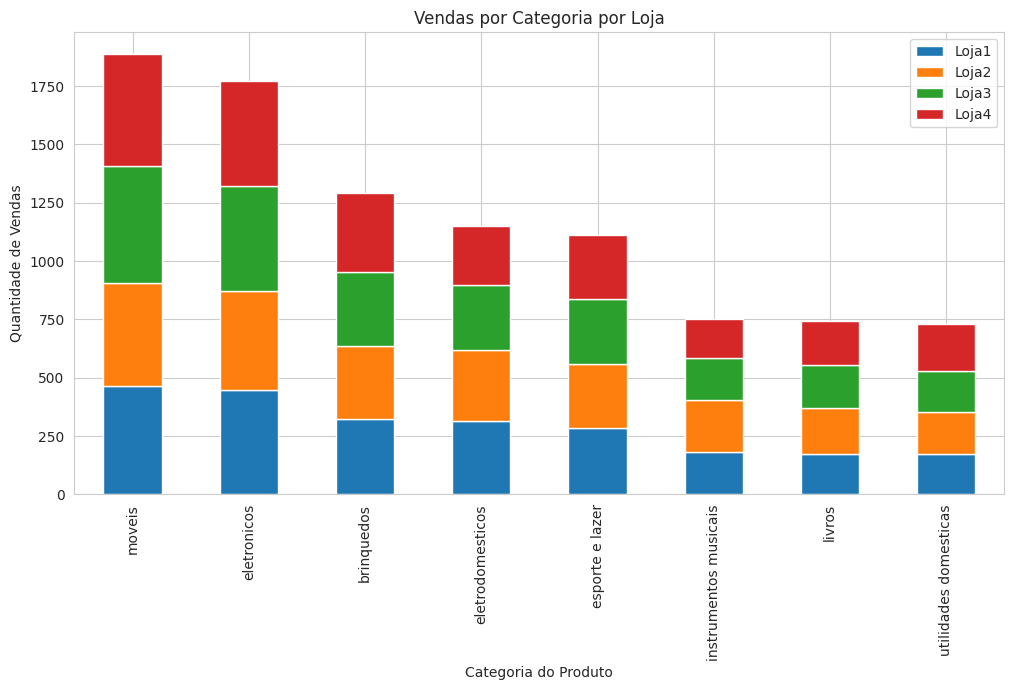

In [86]:
# Visualização
df_vendas.drop('Total', axis=1).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Vendas por Categoria por Loja')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Categoria do Produto')
plt.show()

#**3. Média de Avaliação das lojas**


In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
# Solução 1 - Média individual
media1 = loja['Avaliação da compra'].mean()
media2 = loja2['Avaliação da compra'].mean()
media3 = loja3['Avaliação da compra'].mean()
media4 = loja4['Avaliação da compra'].mean()

print(f"Média de avaliação Loja 1: {media1:.2f}/5")
print(f"Média de avaliação Loja 2: {media2:.2f}/5")
print(f"Média de avaliação Loja 3: {media3:.2f}/5")
print(f"Média de avaliação Loja 4: {media4:.2f}/5")

Média de avaliação Loja 1: 3.98/5
Média de avaliação Loja 2: 4.04/5
Média de avaliação Loja 3: 4.05/5
Média de avaliação Loja 4: 4.00/5


#**4. Produtos Mais e Menos Vendidos**

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de lojas
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Dicionário para armazenar os resultados
resultado_produtos = {}

for df, nome in zip(lojas, nomes_lojas):
    vendas = df['Produto'].value_counts().reset_index()
    vendas.columns = ['Produto', 'Total Vendas']

    mais_vendido = vendas.loc[vendas['Total Vendas'].idxmax()]
    menos_vendido = vendas.loc[vendas['Total Vendas'].idxmin()]

    resultado_produtos[nome] = {
        'Mais Vendido': mais_vendido['Produto'],
        'Quantidade (Mais Vendido)': mais_vendido['Total Vendas'],
        'Menos Vendido': menos_vendido['Produto'],
        'Quantidade (Menos Vendido)': menos_vendido['Total Vendas']
    }

In [92]:
# Resultado final
df_resultado_produtos = pd.DataFrame(resultado_produtos).T
print(df_resultado_produtos)

                    Mais Vendido Quantidade (Mais Vendido)      Menos Vendido  \
Loja 1               Micro-ondas                        60            Headset   
Loja 2  Iniciando em programação                        65  Jogo de tabuleiro   
Loja 3             Kit banquetas                        57   Blocos de montar   
Loja 4                  Cama box                        62           Guitarra   

       Quantidade (Menos Vendido)  
Loja 1                         33  
Loja 2                         32  
Loja 3                         35  
Loja 4                         33  


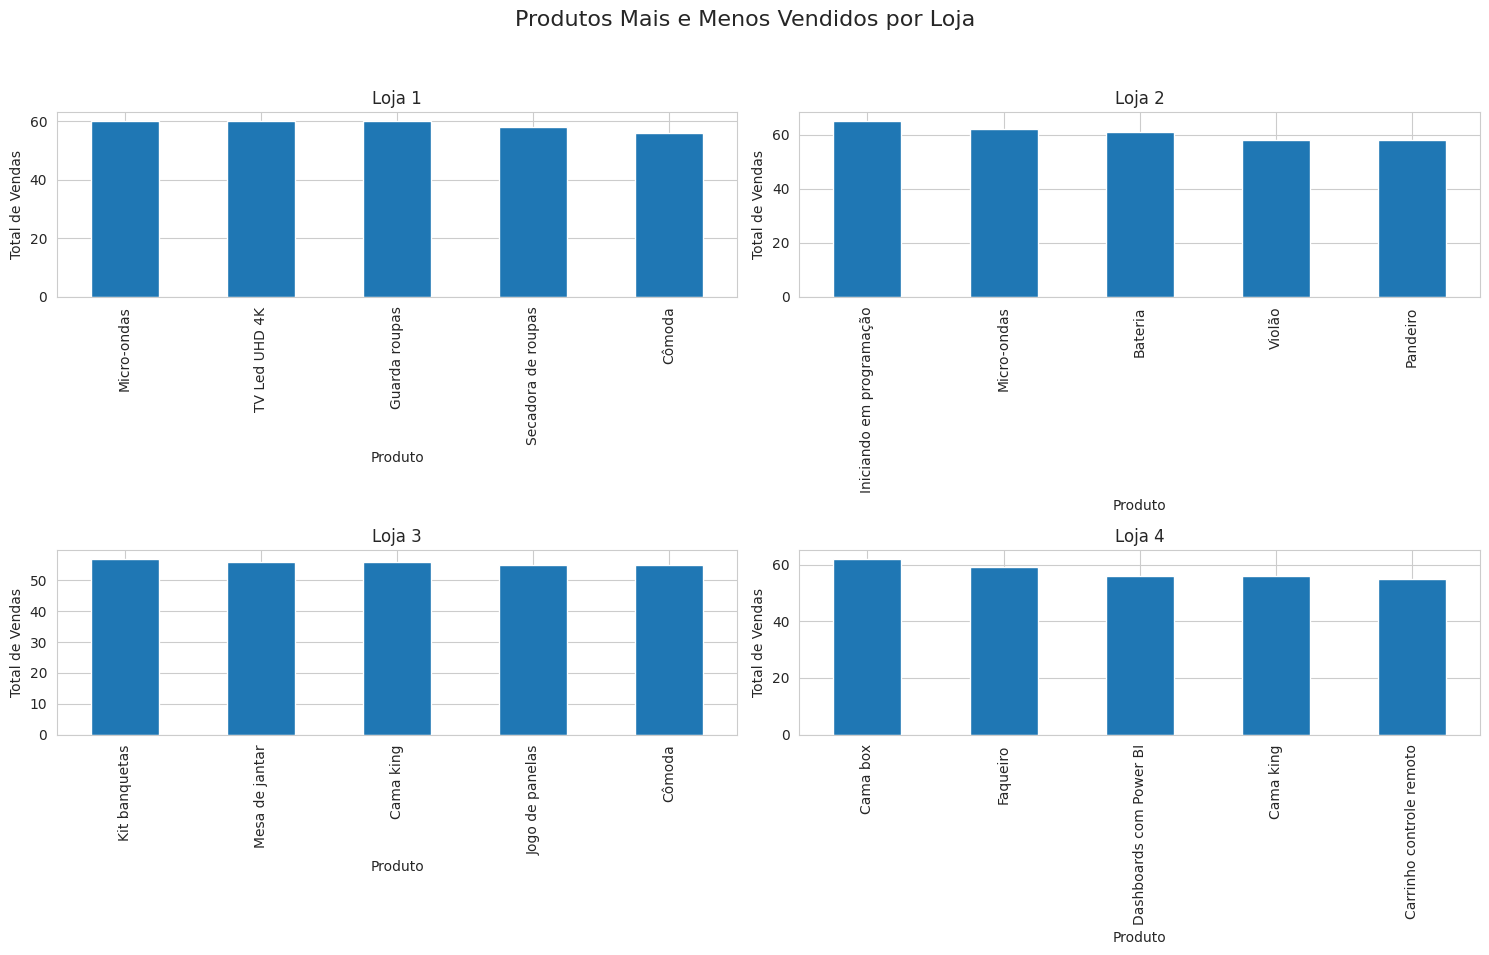

In [93]:
# Visualização
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Produtos Mais e Menos Vendidos por Loja', fontsize=16)

for i, (df, nome) in enumerate(zip(lojas, nomes_lojas)):
    ax = axes[i//2, i%2]
    vendas = df['Produto'].value_counts().head(5)
    vendas.plot(kind='bar', ax=ax)
    ax.set_title(nome)
    ax.set_ylabel('Total de Vendas')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#**5. Frete Médio por Loja**

In [95]:
import pandas as pd

# Lista de lojas
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Calcular o frete médio
for df, nome in zip(lojas, nomes_lojas):
    frete_medio = df['Frete'].mean()
    print(f"Frete médio {nome}: R${frete_medio:.2f}")

Frete médio Loja 1: R$34.69
Frete médio Loja 2: R$33.62
Frete médio Loja 3: R$33.07
Frete médio Loja 4: R$31.28


In [96]:
# Resumo em DataFrame
dados_frete = {
    "Loja": nomes_lojas,
    "Frete Médio (R$)": [df['Frete'].mean() for df in lojas]
}

df_frete = pd.DataFrame(dados_frete)
print(df_frete)

     Loja  Frete Médio (R$)
0  Loja 1         34.691805
1  Loja 2         33.621941
2  Loja 3         33.074464
3  Loja 4         31.278997


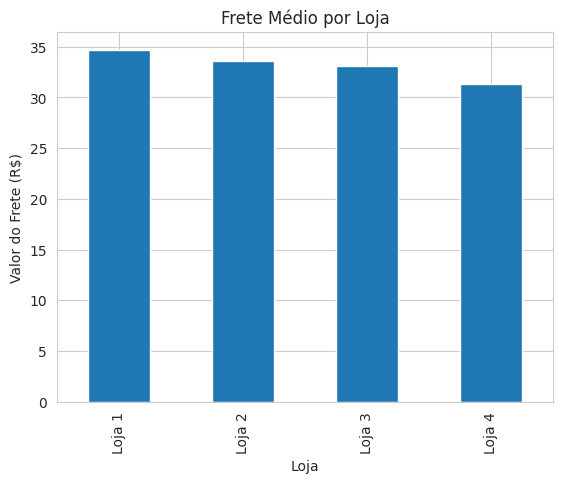

In [97]:
# Visualização
import matplotlib.pyplot as plt

df_frete.plot(x='Loja', y='Frete Médio (R$)', kind='bar', legend=False)
plt.title('Frete Médio por Loja')
plt.ylabel('Valor do Frete (R$)')
plt.show()